___

___
# K Means Clustering with Python


## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data.

In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:

Reassign data points to the cluster whose centroid is closest.
Calculate new centroid of each cluster.

These two steps are repeated till the within cluster variation cannot be reduced any further.
The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Read Data


We will use a data frame with 777 observations on the following 18 variables.
* Private: A factor with levels No and Yes indicating private or public university
* Apps: Number of applications received
* Accept: Number of applications accepted
* Enroll: Number of new students enrolled
* Top10perc: Pct. new students from top 10% of H.S. class
* Top25perc: Pct. new students from top 25% of H.S. class
* F.Undergrad: Number of fulltime undergraduates
* P.Undergrad: Number of parttime undergraduates
* Outstate: Out-of-state tuition
* Room:Board Room and board costs
* Books: Estimated book costs
* Personal: Estimated personal spending
* PhD: Pct. of faculty with Ph.D.’s
* Terminal: Pct. of faculty with terminal degree
* S.F.Ratio: Student/faculty ratio
* perc.alumni: Pct. alumni who donate
* Expend: Instructional expenditure per student
* Grad.Rate: Graduation rate

**Read Data College_Data**

In [ ]:
df = pd.read_csv("College_Data.csv")

In [ ]:
df.head()

,Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### Exploratory Data Analysis and Visualization

**Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [ ]:
df.isna().sum()

Name           0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [ ]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


****Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.****

* F.Undergrad: Number of fulltime undergraduates
* Outstate: Out-of-state tuition

<Axes: xlabel='F.Undergrad', ylabel='Outstate'>

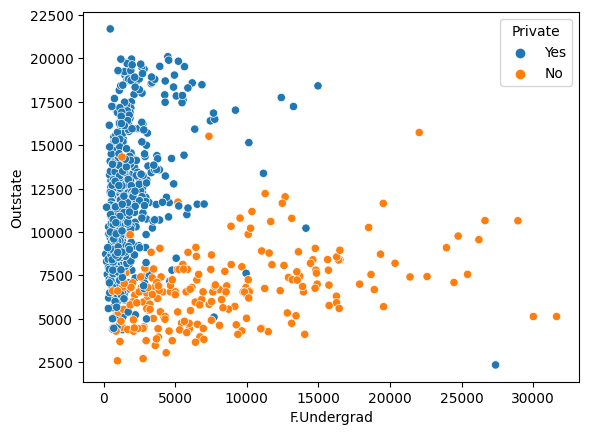

In [ ]:
sns.scatterplot(x = df["F.Undergrad"], y = df["Outstate"], hue=df["Private"])

**Create a histogram of "PhD" column where the bars are colored by the Private column**

PhD: Pct. of faculty with Ph.D.’s

<Axes: xlabel='PhD', ylabel='Count'>

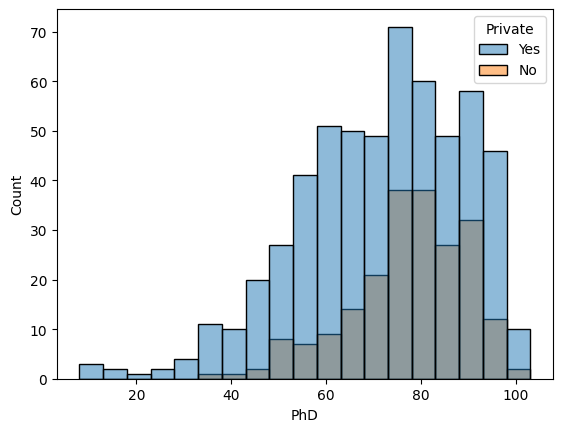

In [ ]:
sns.histplot(x = df['PhD'], hue = df['Private'])

**Create a histogram of "Grad.Rate" column where the bars are colored by the Private column**

Grad.Rate: Graduation rate

<Axes: xlabel='Grad.Rate', ylabel='Count'>

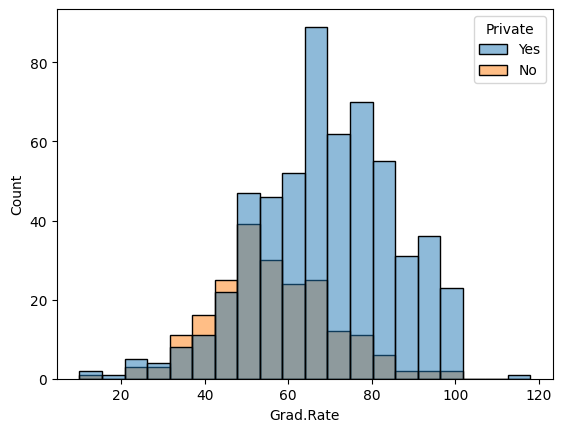

In [ ]:
sns.histplot(x = df['Grad.Rate'], hue = df['Private'])

**Convert "Private" to numeric column using 0 for "Yes", and 1 for "No"**

In [ ]:
df['Private'].replace(('Yes', 'No'), (1, 0), inplace=True)

**Create a heatmap that displays the correlation between all the columns.**

<Axes: >

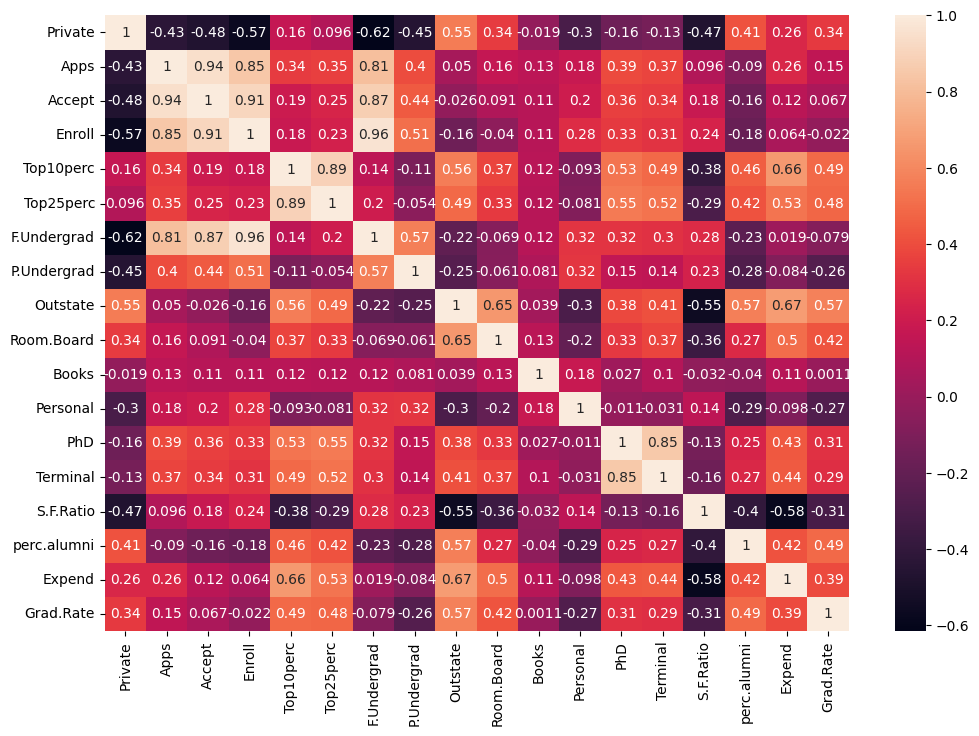

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

**The 3 Most correlated features with the "Private" column**

PS: Consider converting negative to positive values.

In [ ]:
df.corr()['Private'].abs().sort_values()
df.corr()['Private'].abs().sort_values()[-3:]
df.corr()['Private'].abs().sort_values(ascending=False)[:3]

Private        1.000000
F.Undergrad    0.615561
Enroll         0.567908
Name: Private, dtype: float64

## K Means Cluster Creation

Now it is time to create the Cluster labels!

**Import KMeans from SciKit Learn.**

In [ ]:
from sklearn.cluster import KMeans

**Select features (X)**

**Using only F.Undergrad and Enroll for easy visualisation**

In [ ]:
df[["F.Undergrad","Enroll"]]

,F.Undergrad,Enroll
0,2885,721
1,2683,512
2,1036,336
3,510,137
4,249,55
...,...,...
772,3089,543
773,2849,695
774,2793,695
775,5217,1317


In [ ]:
X = df[["F.Undergrad","Enroll"]].values

## Creating the Clusters

K = 3

In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=2)

**Check selected cluster centers**

In [ ]:
kmeans.cluster_centers_

array([[ 2119.94837758,   493.36578171],
       [14520.23232323,  2742.7979798 ]])

**Check assigned groups to data points**

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Check the Sum of squared distances (inertia)**

In [ ]:
kmeans.inertia_

5206155374.09551

**Use the elbow method to find the optimal number of clusters**

In [ ]:
ssd = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    ssd.append(kmeans.inertia_)

**Plot number of clusters/performence**

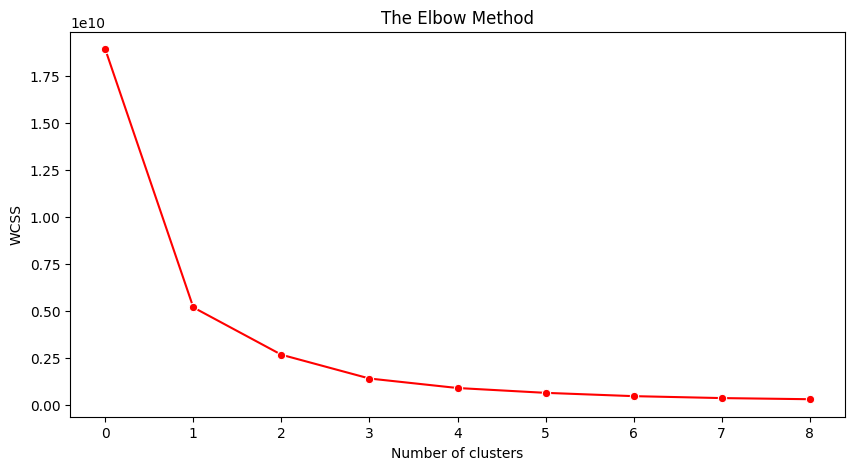

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(ssd, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Train Kmeans with k=2**

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

**Assign labels to new "label" column**

In [ ]:
labels_sample = kmeans.labels_
df['label'] = labels_sample

**Scatterplot between the features, using label as color**

<Axes: xlabel='F.Undergrad', ylabel='Enroll'>

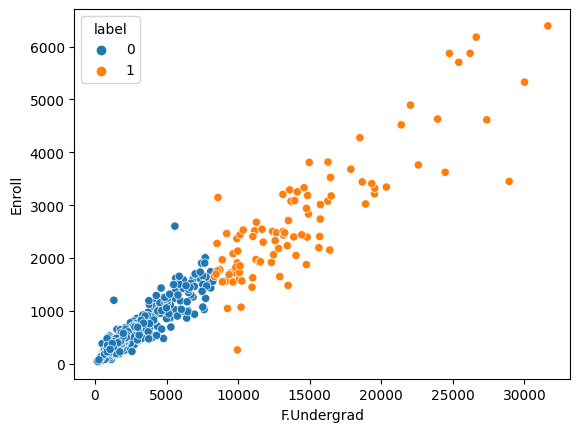

In [ ]:
sns.scatterplot(x = df["F.Undergrad"], y = df['Enroll'], hue=df['label'])

**Plot data with "Private" column using F.Undergrad and Enroll**

<Axes: xlabel='F.Undergrad', ylabel='Enroll'>

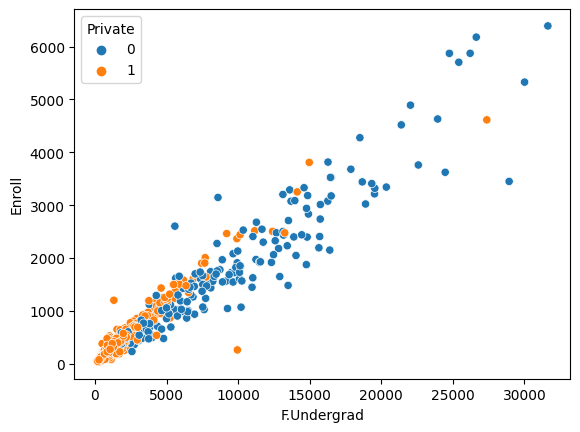

In [ ]:
sns.scatterplot(x = df["F.Undergrad"], y = df['Enroll'], hue=df['Private'])

# Great Job!